<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [66]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [67]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [68]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [69]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

# model = Sequential()
# model.add(Dense(n_dense,
#                 input_dim=n_input,
#                 kernel_initializer=w_init,
#                 bias_initializer=b_init))
# model.add(Activation('sigmoid'))

In [70]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 1.5))

model.add(layers.Dense(neurons * 8, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [71]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 227ms/step


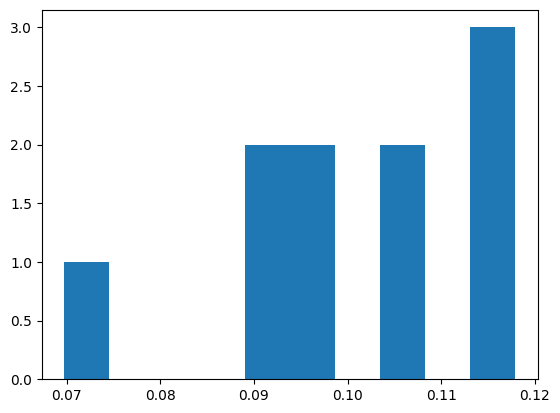

In [72]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [73]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=12,
                                   restore_best_weights=True,
                                   )

In [74]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=128,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/300
391/391 [==============================] - 20s 40ms/step - loss: 0.7658 - accuracy: 0.7523 - val_loss: 0.4555 - val_accuracy: 0.8401
Epoch 2/300
391/391 [==============================] - 15s 39ms/step - loss: 0.5037 - accuracy: 0.8204 - val_loss: 0.4426 - val_accuracy: 0.8370
Epoch 3/300
391/391 [==============================] - 17s 43ms/step - loss: 0.4466 - accuracy: 0.8378 - val_loss: 0.3791 - val_accuracy: 0.8615
Epoch 4/300
391/391 [==============================] - 16s 42ms/step - loss: 0.4202 - accuracy: 0.8434 - val_loss: 0.3808 - val_accuracy: 0.8570
Epoch 5/300
391/391 [==============================] - 16s 42ms/step - loss: 0.3964 - accuracy: 0.8550 - val_loss: 0.3538 - val_accuracy: 0.8719
Epoch 6/300
391/391 [==============================] - 16s 40ms/step - loss: 0.3871 - accuracy: 0.8589 - val_loss: 0.3656 - val_accuracy: 0.8668
Epoch 7/300
391/391 [==============================] - 16s 40ms/step - loss: 0.3761 - accuracy: 0.8608 - val_loss: 0.3465 - val_ac

In [75]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


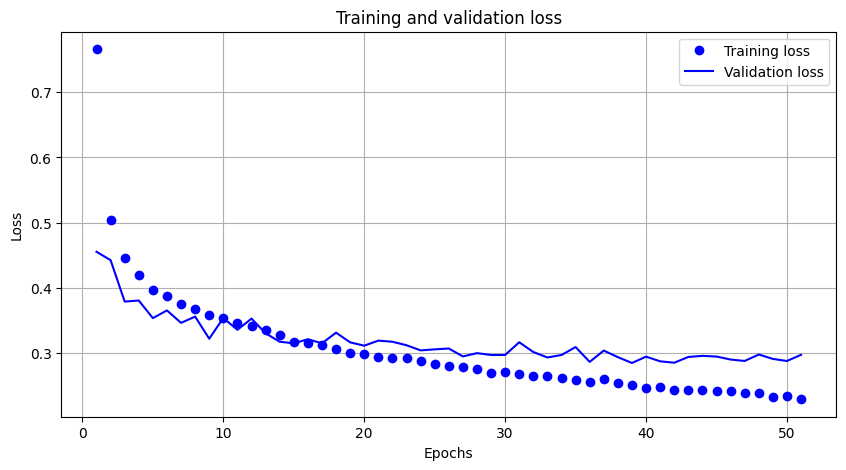

<Figure size 640x480 with 0 Axes>

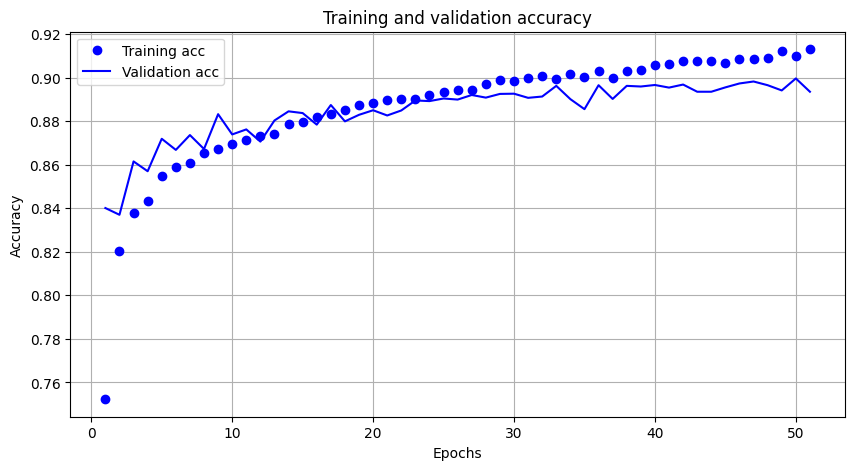

In [76]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [77]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [78]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [79]:
predictions[0]

array([0.08537231, 0.0853724 , 0.08537225, 0.08537225, 0.08537222,
       0.08542245, 0.08537226, 0.08556429, 0.08537222, 0.23140731],
      dtype=float32)

In [80]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dropout_16 (Dropout)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_14 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_15 (Ba  (None, 256)               1024      
 tchNormalization)                                    